In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
import tensorflow as tf

# SimpleRNN

In [3]:
from tensorflow.keras.layers import SimpleRNN

입력데이터 (batch_size, timesteps, input_features)

### SimpleRNN 두 가지 모드

1) 각 타임스텝의 출력을 모은 전체 시퀀스를 반환(크기가 `(batch_size, timesteps, output_features)`인 3D 텐서

2) 입력 시퀀스에 대한 마지막 출력만 반환(크기가 `(batch_size, output_features)`인 2D 텐서). 이 모드는 객체를 생성할 때 `return_sequences` 매개변수로 선택할 수 있습니다.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


네트워크의 표현력을 증가시키기 위해 여러 개의 순환 층을 차례대로 쌓음

In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


IMDB 영화 리뷰 분류 문제
 - 데이터 전처리

In [7]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
17465344/17464789 [==============================] - 0s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


`Embedding` 층과 `SimpleRNN` 층을 사용해 간단한 순환 네트워크를 학습


In [8]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))    #10000
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop'
              , loss='binary_crossentropy'
              , metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128, 
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 53s 335ms/step - loss: 0.6287 - acc: 0.6274 - val_loss: 0.4948 - val_acc: 0.7648
Epoch 2/10
157/157 [==============================] - 52s 332ms/step - loss: 0.4104 - acc: 0.8242 - val_loss: 0.4883 - val_acc: 0.7594
Epoch 3/10
157/157 [==============================] - 53s 335ms/step - loss: 0.3008 - acc: 0.8794 - val_loss: 0.4021 - val_acc: 0.8368
Epoch 4/10
157/157 [==============================] - 53s 340ms/step - loss: 0.2416 - acc: 0.9067 - val_loss: 0.3578 - val_acc: 0.8582
Epoch 5/10
157/157 [==============================] - 53s 339ms/step - loss: 0.2018 - acc: 0.9252 - val_loss: 0.3798 - val_acc: 0.8582
Epoch 6/10
157/157 [==============================] - 53s 336ms/step - loss: 0.1523 - acc: 0.9455 - val_loss: 0.4711 - val_acc: 0.8306
Epoch 7/10
157/157 [==============================] - 53s 337ms/step - loss: 0.0973 - acc: 0.9663 - val_loss: 0.4455 - val_acc: 0.8590
Epoch 8/10
157/157 [==============================] - 5

In [9]:
input_train.shape

(25000, 500)

### Accuracy & Loss

In [10]:
import matplotlib.pyplot as plt

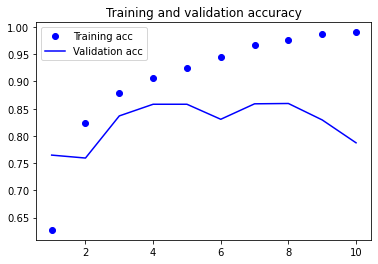

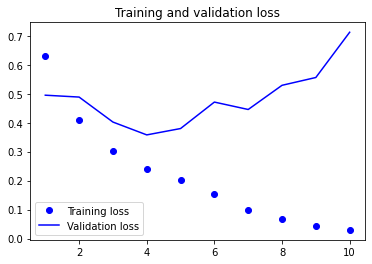

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

SimpleRNN 기존모델(logistic regression)보다 성능이 높지 않음(85% 정도의 val_acc). 이런 원인은 전체 시퀀스가 아니라 처음 500개의 단어만 입력에 사용했기 때문

## LSTM 예제

In [13]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 34ms/step - loss: 0.5015 - acc: 0.7638 - val_loss: 0.3379 - val_acc: 0.8604
Epoch 2/10
157/157 [==============================] - 5s 31ms/step - loss: 0.2937 - acc: 0.8863 - val_loss: 0.3701 - val_acc: 0.8508
Epoch 3/10
157/157 [==============================] - 5s 31ms/step - loss: 0.2323 - acc: 0.9122 - val_loss: 0.3294 - val_acc: 0.8736
Epoch 4/10
157/157 [==============================] - 5s 31ms/step - loss: 0.2054 - acc: 0.9250 - val_loss: 0.2855 - val_acc: 0.8778
Epoch 5/10
157/157 [==============================] - 5s 31ms/step - loss: 0.1779 - acc: 0.9358 - val_loss: 0.2974 - val_acc: 0.8808
Epoch 6/10
157/157 [==============================] - 5s 31ms/step - loss: 0.1617 - acc: 0.9425 - val_loss: 0.3139 - val_acc: 0.8896
Epoch 7/10
157/157 [==============================] - 5s 31ms/step - loss: 0.1442 - acc: 0.9475 - val_loss: 0.3582 - val_acc: 0.8838
Epoch 8/10
157/157 [==============================] - 5s 32ms/step - 

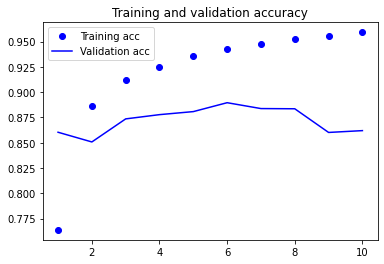

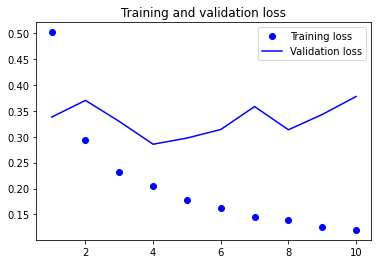

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()